# CA1

Scenario: 

You have been retained by a haulage company to analyse a dataset based on data collected from heavy Scania trucks in everyday usage. The system in focus is the Air Pressure system (APS) which generates pressurised air that are utilized in various functions in a truck, such as braking and gear changes. The dataset’s  positive class consists of component failures for a specific component of the APS system.

The negative class consists of trucks with failures for components not related to the APS. The data consists  of a subset of all available data, selected by experts. This analysis will help determine the investment strategy for the company in the upcoming year.

All data wrangling, analysis, and visualizations must generated using python.

The companies CTO also requires you to rationalize all the decisions that you have made in your report.

Minimum Requirements 

You are required to use the dataset contained within the file “aps_failure_set.csv”, conduct the following analysis and report on your findings:

Characterization of the data set: size; number of attributes; has/does not have missing values, number of observations etc.

Application of Data preparation/evaluation methods (Cleaning, renaming, etc) and EDA visualizations (plural), including a clear and concise explanation of your rationale for what you are doing with the data and why you are doing it.
Use PCA to establish the minimum number of features needed for retaining 99.5% variance in the data and then implement PCA to dimensionally reduce the data to the number of features that you have discovered. Include a clear and concise explanation of your rationale for what you are doing with the data and why you are doing it.
Explain in your own words what the “Curse of Dimensionality ” is and how it may affect your analysis going forward.
Conclusions, Findings of data set and references (HARVARD style).
Note that all written work MUST be completed in Jupyter Notebook Markdown (please review “Jupyter Notebook Tutorial” Notes in Moodle if you are unsure of this).

All Code must be included in code blocks (As normal). No other upload will be accepted.

All written work MUST be detailed in your Jupyter Markdown (NOT in code comments).



# IMORTING LIBRARIES

In [127]:
%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn import preprocessing

from sklearn.model_selection import train_test_split 

# EDA

In [78]:
ca1 = pd.read_csv("aps_failure_set.csv")

In [79]:
ca1.head(10)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
5,neg,38312,na,2130706432,218,0,0,0,0,0,...,388574,288278,900430,300412,1534,338,856,0,0,0
6,neg,14,0,6,na,0,0,0,0,0,...,168,48,60,28,0,0,0,0,0,0
7,neg,102960,na,2130706432,116,0,0,0,0,0,...,715518,384948,915978,1052166,1108672,341532,129504,7832,0,0
8,neg,78696,na,0,na,0,0,0,0,0,...,699290,362510,1190028,1012704,160090,63216,41202,4,0,0
9,pos,153204,0,182,na,0,0,0,0,0,...,129862,26872,34044,22472,34362,0,0,0,0,0


In [80]:
ca1.shape

(60000, 171)

In [81]:
ca1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


In [82]:
ca1.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

here we did not have any missing variables because all the collums were objects

In [83]:
ca1.describe()

,aa_000
count,6.000000e+04
mean,5.933650e+04
std,1.454301e+05
min,0.000000e+00
25%,8.340000e+02
50%,3.077600e+04
75%,4.866800e+04
max,2.746564e+06


In [84]:
ca1.describe(include = "object")

,class,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,...,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000
unique,2,30,2062,1887,334,419,155,618,2423,7880,...,34489,31712,35189,36289,31796,30470,24214,9725,29,50
top,neg,na,0,na,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,59000,46329,8752,14861,55543,55476,59133,58587,56181,46894,...,1364,1557,1797,2814,4458,7898,17280,31863,57021,56794


<Axes: xlabel='class', ylabel='Count'>

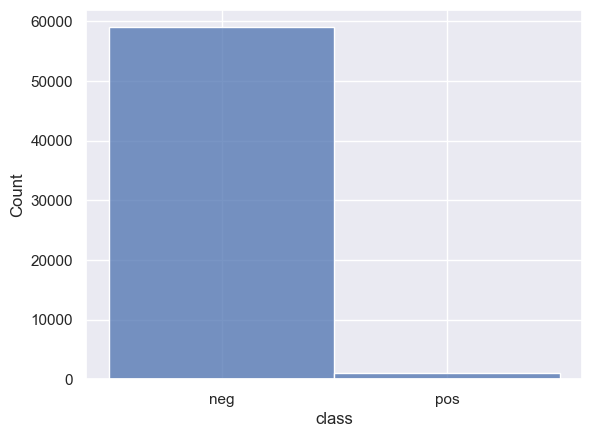

In [85]:
sns.histplot(data = ca1, x = "class")

The distribution of this data set is very skewed (To which size? left or right?)

In [86]:
ca1.duplicated().sum()

0

In [87]:
miss_vals = ["na"]

here I am defining that all missing values are "na"

In [88]:
ca1 = pd.read_csv("aps_failure_set.csv", na_values = miss_vals)

in here I am making the substitutions all missing values for NaN so all my collums will be counted as numbers (float or int64), because before they were all objects due the "na" being a string

In [89]:
ca1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


In [90]:
ca1.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [91]:
ca1.isnull().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [92]:
ca1.shape

(60000, 171)

In [93]:
class_ca1 = ca1[["class"]]

class_ca1.head()

,class
0,neg
1,neg
2,neg
3,neg
4,neg


In [94]:
class_ca1.count()

class    60000
dtype: int64

In [95]:
class_ca1.value_counts()

class
neg      59000
pos       1000
dtype: int64

I want to count how many neg and how many pos

In [96]:
ca1_split = ca1.drop(["class"], axis = 1)

ca1_split.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [97]:
X = ca1_split

y = class_ca1

In [98]:
y.value_counts()

class
neg      59000
pos       1000
dtype: int64

# DROPPING MISSING VALUES 

In [99]:
ca1_d = ca1.dropna(axis = 0)

ca1_d I am dropping all the missing values

In [100]:
ca1_d.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
16,neg,31300,0.0,784.0,740.0,0.0,0.0,0.0,0.0,0.0,...,798872.0,112724.0,51736.0,7054.0,6628.0,27600.0,2.0,2.0,0.0,0.0
179,neg,97000,0.0,378.0,160.0,0.0,0.0,0.0,0.0,0.0,...,1078982.0,313334.0,511330.0,552328.0,871528.0,871104.0,1980.0,42.0,0.0,0.0
225,neg,124656,2.0,278.0,170.0,0.0,0.0,0.0,0.0,0.0,...,1205696.0,866148.0,697610.0,700400.0,1900386.0,437532.0,3680.0,0.0,0.0,0.0
394,pos,281324,2.0,3762.0,2346.0,0.0,0.0,4808.0,215720.0,967572.0,...,624606.0,269976.0,638838.0,1358354.0,819918.0,262804.0,2824.0,0.0,0.0,0.0
413,pos,43482,0.0,1534.0,1388.0,0.0,0.0,0.0,0.0,40024.0,...,497196.0,121166.0,202272.0,232636.0,645690.0,50.0,0.0,0.0,0.0,0.0


In [101]:
class_d = ca1_d[["class"]]

class_d.head()

,class
16,neg
179,neg
225,neg
394,pos
413,pos


In [102]:
class_d.value_counts()

class
neg      515
pos       76
dtype: int64

target variable from the data set without the missing values

In [103]:
ca1_d.shape

(591, 171)

The amount of missing values is so massive that the remain data set will have only 591 rows (9,85%) after removing all the rows with missing values, losing 90,15% of the original data set. This is a huge loss of information and can be impact negatively in the machine learning model. Further in the analysis I will compare the results of models excluding the missing values with the ones where I replaced them. 

# FIND ARTICLES EXPLAINING WHY EXCLUDE SO MANY VARIABLES WOULD BE BAD

In [104]:
ca1_d.describe(include = "object")

,class
count,591
unique,2
top,neg
freq,515


In [105]:
y.value_counts()

class
neg      59000
pos       1000
dtype: int64

WHY THIS ONE DID NOT WORK?

<Axes: xlabel='class', ylabel='Count'>

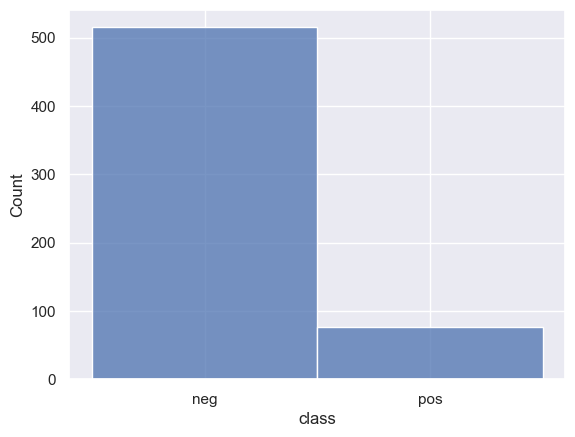

In [106]:
sns.histplot(data = ca1_d, x = "class")

#df["Salary"].fillna(df["Salary"].median())

the distribution is skewed so we need to substitute the NaN values with the median. We have to do this because 
 we lost so many variables when we dropped 

# REPLACING MISSING VALUES WITH THE MEDIAN

In [107]:
X.fillna(X.median(), inplace = True)

In the class I learned that if the distribution of our data set is skewed we should use the median to substitute the missing values. Now I need to prove with academic sources why I am doing this. I found some papers in the CCT library. 

In [108]:
X.shape

(60000, 170)

In [109]:
X.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [110]:
y.head()

,class
0,neg
1,neg
2,neg
3,neg
4,neg


In [111]:
y.info

<bound method DataFrame.info of       class
0       neg
1       neg
2       neg
3       neg
4       neg
...     ...
59995   neg
59996   neg
59997   neg
59998   neg
59999   neg

[60000 rows x 1 columns]>

In [112]:
y.value_counts()

class
neg      59000
pos       1000
dtype: int64

<Axes: xlabel='class', ylabel='Count'>

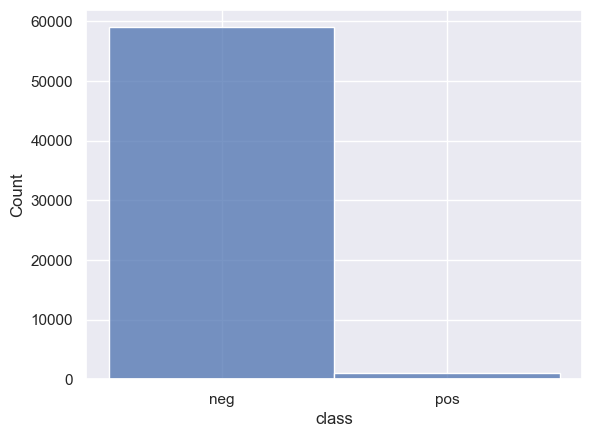

In [113]:
sns.histplot(data = ca1, x = "class")

In [114]:
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

We import this to standardise all the values. As the values have different scales, it is an important step to do PCA to standardise them. Because we are trying to create a new vector space. We have 171 features (columns) so we have 171 dimensions. 

This formula uses the standard deviation that is equal to 1 (m1?) and mean is equal to 0 It is possible to use min and max scaler as well, as it follows: from sklearn.preprocessing import MinMaxScaler This will convert all the values in the range between 0 to 1.
I did not understand this part, in the video he says that to finish the scaling we need to transform operation in the dataset
We transformed the data in an array. This was based on the standard deviation equal to 1 and mean equal to 0 LEARN THE WHAT AN ARRAY IS

# SOURCES ABOUT SCALING, WHY AM I DOING THIS?

In [115]:
pca = PCA()

pca.fit(X_scaled)

PCA()

In [116]:
variance = pca.explained_variance_ratio_

var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 3)*100)

var

array([ 28.8,  33.5,  37.8,  41.4,  44.3,  46.7,  48.6,  50.4,  52.2,
        53.8,  55.2,  56.6,  57.8,  59. ,  60.1,  61.2,  62.2,  63.2,
        64.2,  65.2,  66.1,  67. ,  67.9,  68.8,  69.6,  70.4,  71.2,
        71.9,  72.6,  73.3,  74. ,  74.7,  75.4,  76.1,  76.7,  77.3,
        77.9,  78.5,  79.1,  79.7,  80.3,  80.9,  81.5,  82.1,  82.7,
        83.2,  83.7,  84.2,  84.7,  85.2,  85.7,  86.2,  86.6,  87. ,
        87.4,  87.8,  88.2,  88.6,  89. ,  89.4,  89.8,  90.2,  90.6,
        90.9,  91.2,  91.5,  91.8,  92.1,  92.4,  92.7,  93. ,  93.3,
        93.6,  93.9,  94.1,  94.3,  94.5,  94.7,  94.9,  95.1,  95.3,
        95.5,  95.7,  95.9,  96.1,  96.3,  96.5,  96.7,  96.9,  97.1,
        97.3,  97.4,  97.5,  97.6,  97.7,  97.8,  97.9,  98. ,  98.1,
        98.2,  98.3,  98.4,  98.5,  98.6,  98.7,  98.8,  98.9,  99. ,
        99.1,  99.2,  99.3,  99.4,  99.5,  99.6,  99.7,  99.8,  99.9,
       100. , 100.1, 100.1, 100.1, 100.1, 100.1, 100.1, 100.1, 100.1,
       100.1, 100.1,

In [117]:
pca.explained_variance_ratio_

array([2.87521300e-01, 4.72864002e-02, 4.27757709e-02, 3.58113416e-02,
       2.89658247e-02, 2.35472479e-02, 1.94878785e-02, 1.77520475e-02,
       1.76110981e-02, 1.55473175e-02, 1.43068410e-02, 1.38910181e-02,
       1.22921487e-02, 1.16914706e-02, 1.13712329e-02, 1.08604104e-02,
       1.02075946e-02, 1.01106996e-02, 9.74146397e-03, 9.71715168e-03,
       9.39142994e-03, 9.17687746e-03, 8.99566132e-03, 8.74410079e-03,
       7.89393561e-03, 7.75902494e-03, 7.61637993e-03, 7.26672826e-03,
       7.11572100e-03, 6.95314996e-03, 6.88894067e-03, 6.76859988e-03,
       6.63880204e-03, 6.51154993e-03, 6.48354384e-03, 6.40318063e-03,
       6.16452932e-03, 6.01861287e-03, 5.93526314e-03, 5.91136569e-03,
       5.84779072e-03, 5.75104975e-03, 5.62839734e-03, 5.60688893e-03,
       5.54007234e-03, 5.44528556e-03, 5.29056163e-03, 5.20895385e-03,
       4.93001133e-03, 4.86366740e-03, 4.60297435e-03, 4.54322921e-03,
       4.45017521e-03, 4.29155708e-03, 4.24309885e-03, 4.16235535e-03,
      

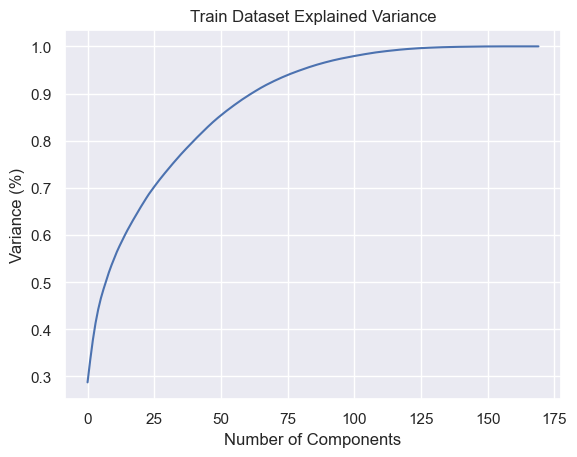

In [118]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Variance (%)")
plt.title("Train Dataset Explained Variance")
plt.show()

In this graph we can see that we can get 100% variance with 125 components, and something between 95% and 100% with 100 components. 

In [119]:
computed_covmat = pca.get_covariance()

print("comvat from PCA:")

print("{}".format(computed_covmat))

comvat from PCA:
[[ 1.00001667e+00  1.40856374e-02 -6.38774595e-02 ...  2.47153607e-01
   1.24087718e-02  2.43878095e-02]
 [ 1.40856374e-02  1.00001667e+00 -2.12835630e-03 ... -1.62475716e-02
   5.62720836e-02  1.06362225e-01]
 [-6.38774595e-02 -2.12835630e-03  1.00001667e+00 ...  1.37644263e-02
  -6.26212934e-03  1.47471475e-02]
 ...
 [ 2.47153607e-01 -1.62475716e-02  1.37644263e-02 ...  1.00001667e+00
  -3.43901873e-03 -9.71000041e-04]
 [ 1.24087718e-02  5.62720836e-02 -6.26212934e-03 ... -3.43901873e-03
   1.00001667e+00  2.82205226e-01]
 [ 2.43878095e-02  1.06362225e-01  1.47471475e-02 ... -9.71000041e-04
   2.82205226e-01  1.00001667e+00]]


If I cannot do a heatmap why should I do the covariance matrix? For what am I going to use this?

sns.heatmap(computed_covmat, annot = True)

from IPython.display import Image
Image(filename =r'heatmap.png')

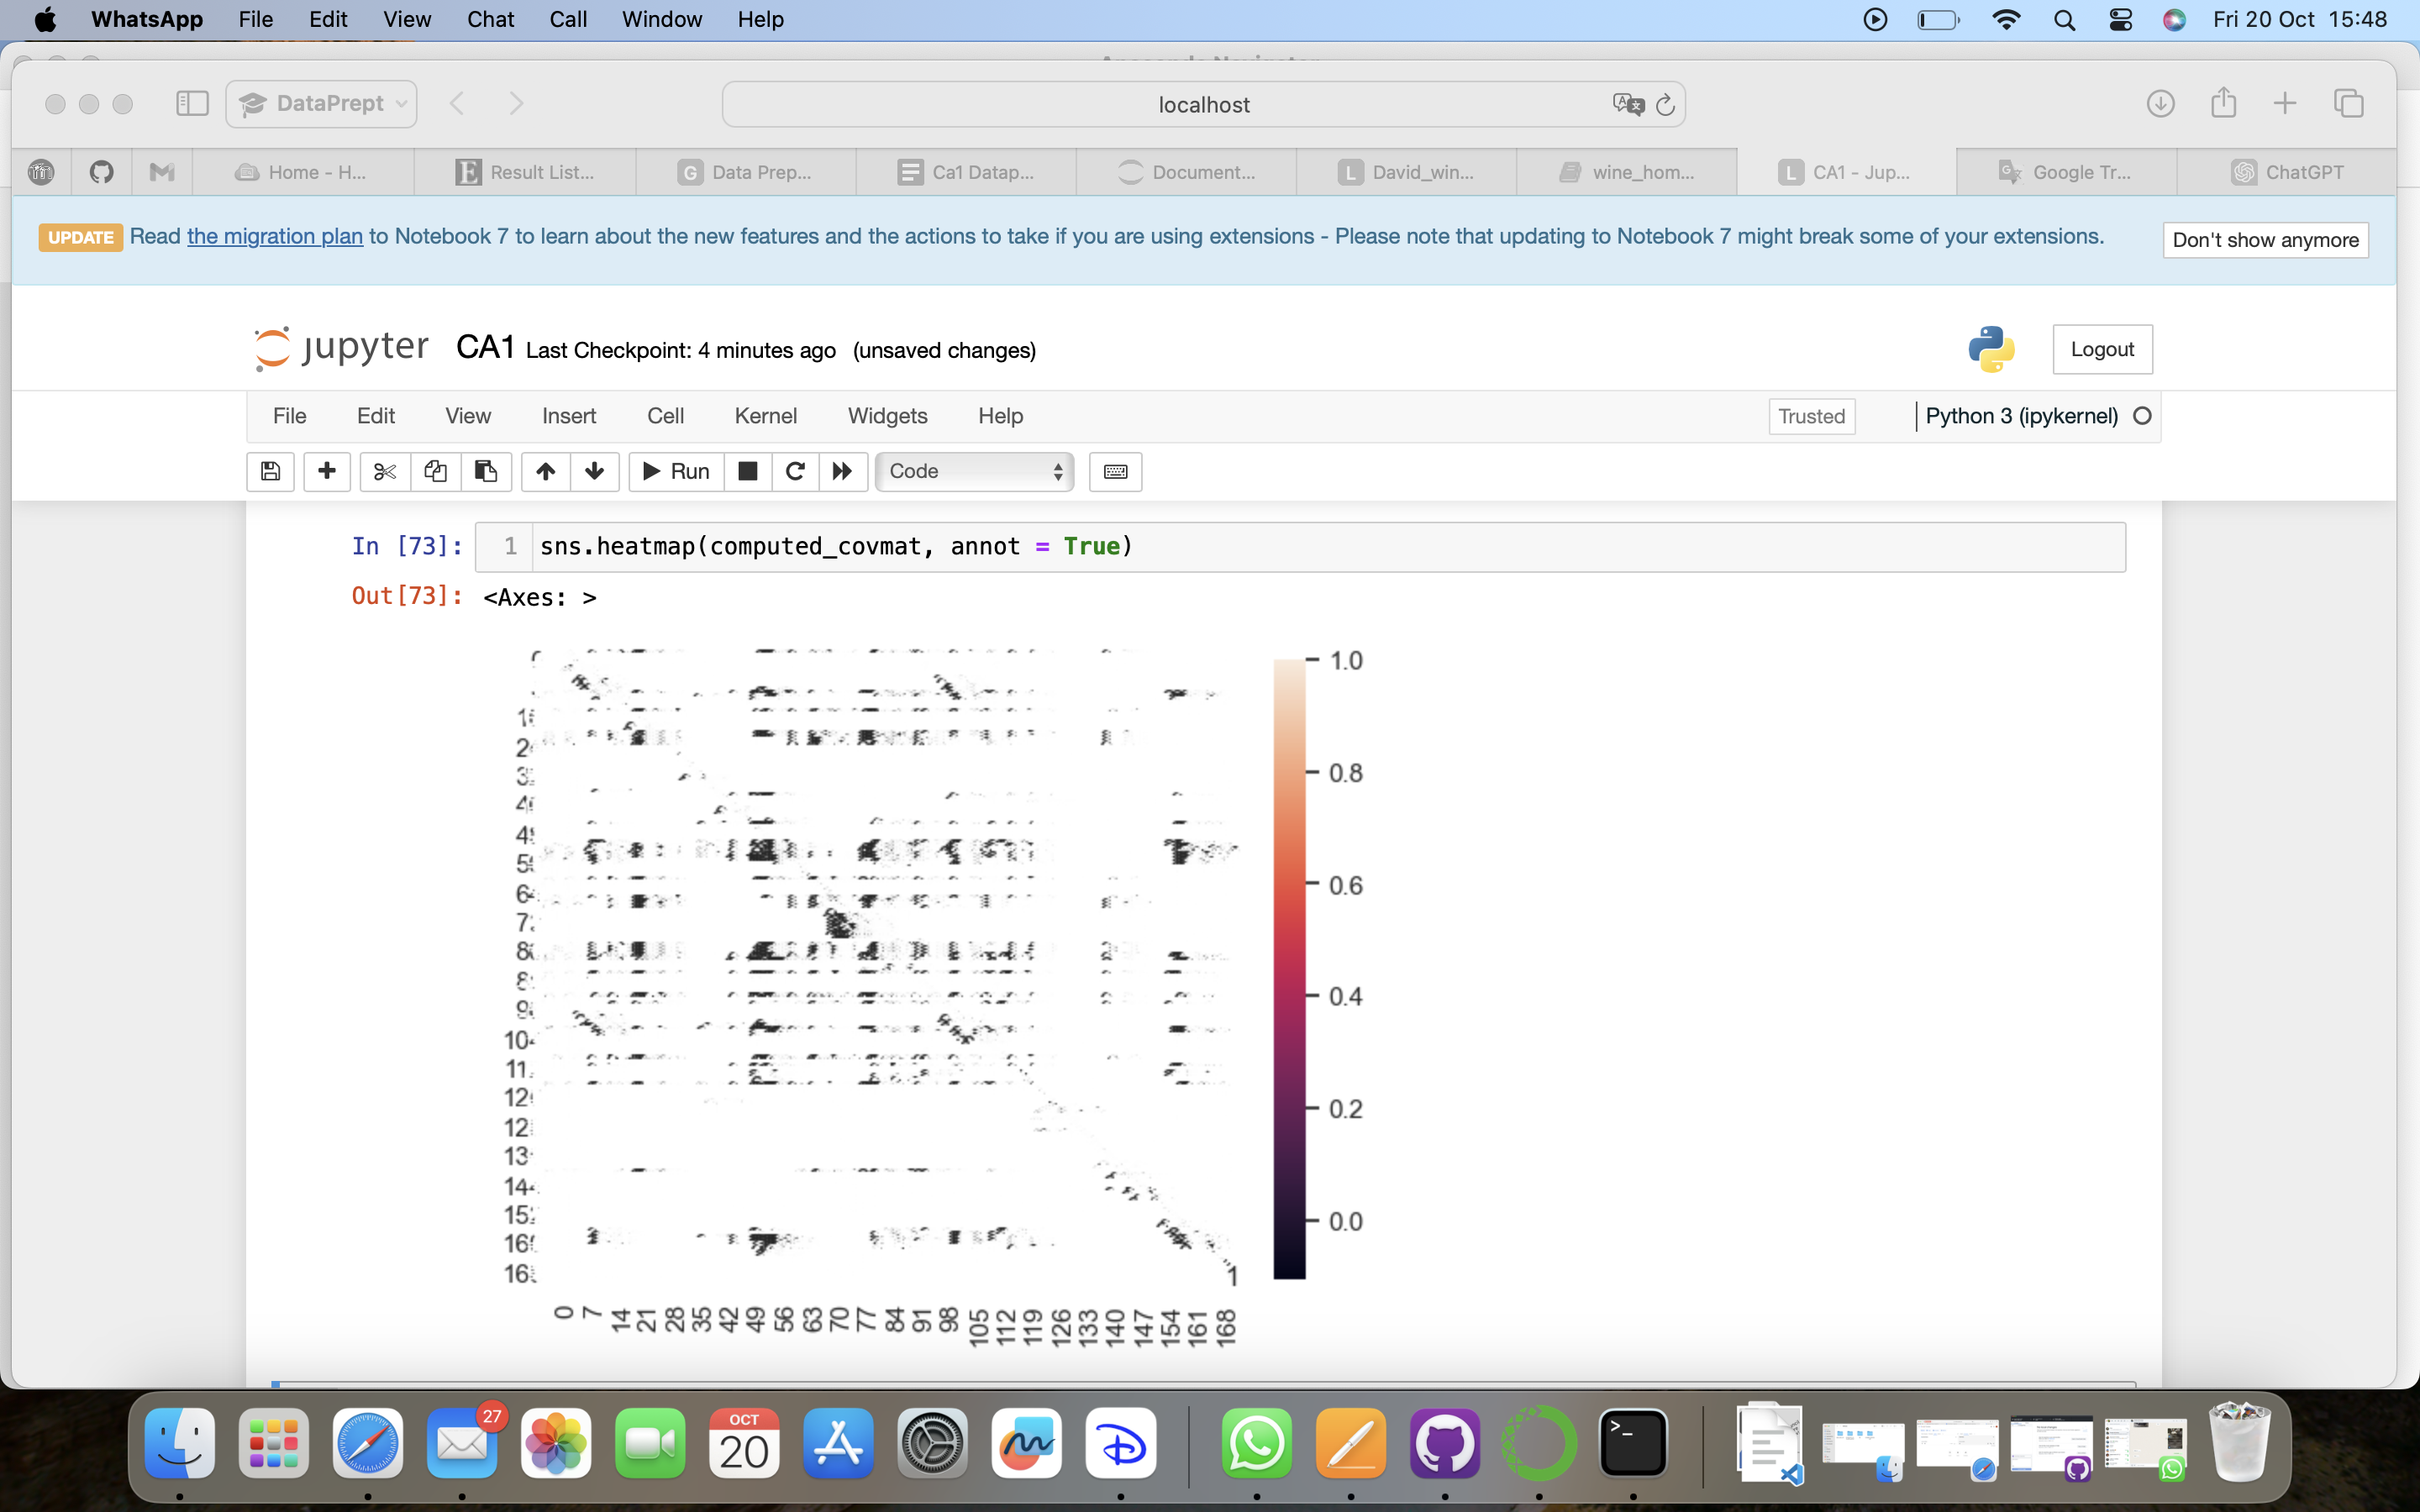

In [120]:
from IPython.display import Image
Image(filename =r'heatmap.png')

Impossible to do a heatmap with so many variables. Anyway, David does not like heatmap as he told me that he does not get it why people do it

# APPLYING PCA

As we saw in the graph we need at least 60 components to keep 90% of the variance. The objective of this project is to keep 99.5% of the variance. I am going to test some scenerios: apply the PCA choosing the number of components, and test differents numbers; and apply PCA with 0.995, telling the algorithm that I want to keep 99.5% of the information 

In [121]:
pca = PCA(n_components = 100)

ca1_pca = pca.fit_transform(X_scaled)

i am passing my data frame in the pca algorithm so it can analise, and I do this with the data fram without the target variable.

X is all the features except the class

In [123]:
ca1_pca = pd.DataFrame(ca1_pca)

ca1_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2.374500,-1.127649,-0.870419,1.728910,-0.061791,0.755185,0.397276,0.002817,-0.358145,-1.403686,...,-0.164240,0.249411,0.297239,-0.051372,-0.288582,-0.331742,-0.154381,0.229453,-0.075884,0.224627
1,-0.615524,-0.550443,-0.035569,0.088882,-0.137165,0.109337,0.174648,-0.006076,0.139655,0.245000,...,-0.317270,-0.243284,-0.172910,-0.305319,0.215547,0.211591,0.400292,0.134424,-0.026067,0.037936
2,-1.205852,-0.059721,-0.771610,-0.500972,-0.038004,0.089636,-0.081018,-0.017045,-0.107396,0.156671,...,0.046234,0.011828,-0.058033,0.067183,0.009547,-0.049983,-0.040403,-0.066552,0.061352,-0.029382
3,-3.188903,0.251461,-0.285778,-0.869549,0.327271,-0.241293,-0.238053,-0.020669,0.583821,1.030810,...,0.010353,0.012079,-0.006466,-0.010923,-0.017215,0.033409,-0.045060,0.031339,-0.027588,-0.001883
4,0.323156,-0.064226,-0.612063,0.688140,-0.565306,0.215714,0.068441,0.007875,-0.514091,-1.137266,...,0.015228,0.208769,0.175836,-0.003914,0.018272,-0.113167,0.232471,-0.120691,0.098571,-0.077467


Too many columns to rename, waste of time. 

In [125]:
ca1_concat = pd.concat([ca1_pca, y[["class"]]], axis = 1)

ca1_concat.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,class
0,2.374500,-1.127649,-0.870419,1.728910,-0.061791,0.755185,0.397276,0.002817,-0.358145,-1.403686,...,0.249411,0.297239,-0.051372,-0.288582,-0.331742,-0.154381,0.229453,-0.075884,0.224627,neg
1,-0.615524,-0.550443,-0.035569,0.088882,-0.137165,0.109337,0.174648,-0.006076,0.139655,0.245000,...,-0.243284,-0.172910,-0.305319,0.215547,0.211591,0.400292,0.134424,-0.026067,0.037936,neg
2,-1.205852,-0.059721,-0.771610,-0.500972,-0.038004,0.089636,-0.081018,-0.017045,-0.107396,0.156671,...,0.011828,-0.058033,0.067183,0.009547,-0.049983,-0.040403,-0.066552,0.061352,-0.029382,neg
3,-3.188903,0.251461,-0.285778,-0.869549,0.327271,-0.241293,-0.238053,-0.020669,0.583821,1.030810,...,0.012079,-0.006466,-0.010923,-0.017215,0.033409,-0.045060,0.031339,-0.027588,-0.001883,neg
4,0.323156,-0.064226,-0.612063,0.688140,-0.565306,0.215714,0.068441,0.007875,-0.514091,-1.137266,...,0.208769,0.175836,-0.003914,0.018272,-0.113167,0.232471,-0.120691,0.098571,-0.077467,neg


Is this really necessary?

# SPLITTING AND TRAINING OUR MODEL

In [132]:
ca1_array = ca1_concat.values

In [136]:
X = ca1_array[:,0:100]

y = ca1_array[:,100]

In [137]:
y

array(['neg', 'neg', 'neg', ..., 'neg', 'neg', 'neg'], dtype=object)

In [138]:
X

array([[2.3744996388342714, -1.127649472525068, -0.8704192550277794, ...,
        0.22945339487686997, -0.07588351338734098, 0.2246271551235362],
       [-0.6155239955271163, -0.5504426046117364, -0.03556939230760661,
        ..., 0.13442350825123742, -0.026066673635303614,
        0.03793552969812953],
       [-1.2058523563086412, -0.05972109114348748, -0.7716101390106622,
        ..., -0.06655226074807884, 0.061352393424929416,
        -0.029381823265340442],
       ...,
       [-3.2004014103199547, 0.1664008306406904, -0.41485276040971164,
        ..., -0.03909737856951317, -0.1067310137801335,
        0.02971195538944864],
       [2.3835141876625703, -2.504098005189146, -1.1444943038919568, ...,
        0.36101127680017103, 0.3581020822779563, 1.7660523203809575],
       [-0.7249235913348704, -0.3989527530123195, -0.618277932603489,
        ..., -0.013440159443180229, -0.040300680208975405,
        -0.023138038833939584]], dtype=object)

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

random_state create the random numbers to train the ML

In [144]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

import all the models that I want to test 

and then create a list to store all of them

create a loop 


stratifiedkfold = the training is not going through row by row, but by groups randomly

In [145]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [146]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.989854 (0.001517)
LDA: 0.988917 (0.001695)
KNN: 0.989917 (0.000951)
CART: 0.985563 (0.001551)
NB: 0.965167 (0.003458)
SVM: 0.985458 (0.000677)


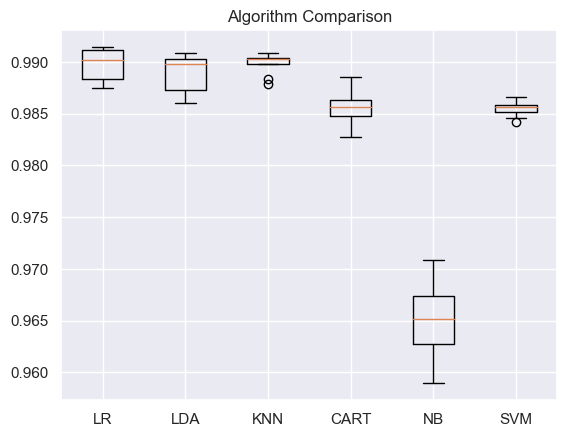

In [147]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

# TESTING ANOTHER TYPE OF PCA

In [163]:
pca_995 = PCA(.995)

pca_995.fit(X_scaled)

PCA(n_components=0.995)

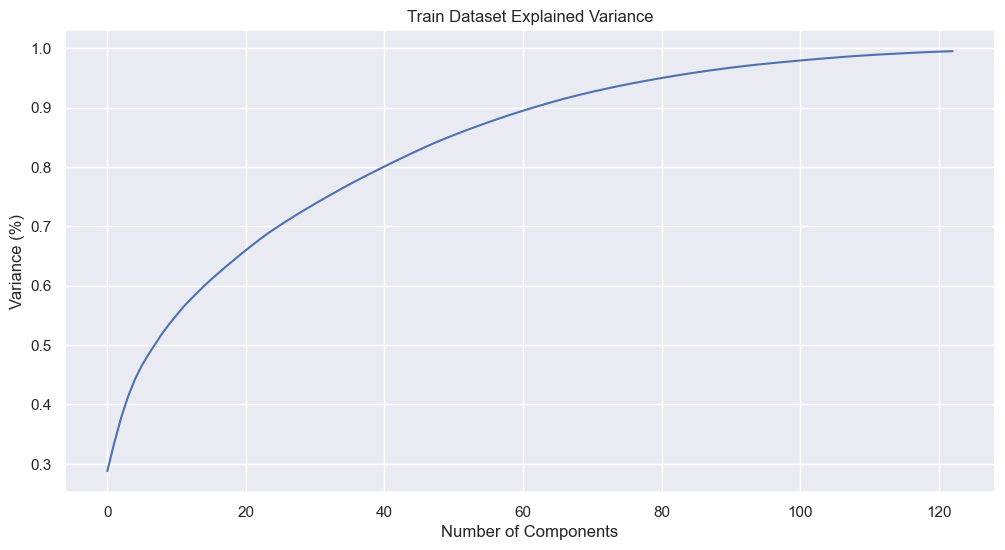

In [164]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Variance (%)")
plt.title("Train Dataset Explained Variance")
plt.show()

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

https://mikulskibartosz.name/pca-how-to-choose-the-number-of-components

GRAPH
pca = PCA().fit(X_scaled)



import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 11, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()